# Libraary

In [1]:
import pickle
import numpy as np
import pandas as pd
import json

# Functions

In [21]:
def plot_data_dict_in_pdf(data: dict, title="Title", path='./figures/', show=False):
    import os
    import matplotlib.pyplot as plt

    if not os.path.exists(path):
        os.makedirs(path)

    # Create a plot
    X = data["x"]
    file_name = data['name']
    if data["dual_axis"]:
        fig, ax1 = plt.subplots()
        Y_1, Y_2 = data["y"]
        Legend_1, Legend_2 = data["legends"]
        label_x, (label_y1, label_y2) = data["labels"]

        ax1.set_xlabel(label_x)
        ax1.set_ylabel(label_y1, color='b')
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # List of colors
        for i, (Y, legend) in enumerate(zip(Y_1, Legend_1)):
            ax1.plot(X, Y, label=legend, color=colors[i % len(colors)])  # Use modulo to loop through colors
        ax1.legend(loc='upper left')

        ax2 = ax1.twinx()
        ax2.set_xlabel(label_x)
        ax2.set_ylabel(label_y2, color='r')
        for i, (Y, legend) in enumerate(zip(Y_2, Legend_2)):
            ax2.plot(X, Y, label=legend, color=colors[(i + len(Y_1)) % len(colors)])  # Start from a new color
        ax2.legend(loc='lower right')

        max_acc = data["max_acc_g"]
        plt.title(title+f":max({max_acc})")        
    else:
        Y = data["y"]
        Legends = data["legends"]
        label_x, label_y = data["labels"]
        for y in Y:
            print(f'Length-> X={len(X)}, Y={len(y)}')
            plt.plot(X,y)
        plt.xlabel(label_x)
        plt.ylabel(label_y)
        plt.title(title)
        plt.legend(Legends, loc = "lower right" )

    # Save the plot as a PDF file
    plt.savefig(f'{path}{file_name}.pdf')
    # Show the plot (optional)
    if show:
        plt.show()

## Filenames for creating plot figure

In [22]:
files = [f'/home/sujit/Github/FedLearn/result/fedproposedvImp_cifar_nc_4_mix_CE_10_lr_0_001_B_50_C_15_E_10_252.json', 
         f'/home/sujit/Github/FedLearn/result/fedproposedvImp_GLR_cifar_nc_4_mix_CE_10_lr_0_001_B_50_C_15_E_10_252.json',
         f'/home/sujit/Github/FedLearn/result/fedSat_cifar_nc_4_mix_CE_10_lr_0_001_B_50_C_15_E_10_251.json'
         ]
s_file = files[0].split('/')
method = s_file[-1].split("_")[0]
print(method)

fedproposedvImp


dict_keys(['name', 'x', 'dual_axis', 'y', 'legends', 'labels', 'max_acc_g'])
dict_keys(['name', 'x', 'dual_axis', 'y', 'legends', 'labels', 'max_acc_g'])
dict_keys(['name', 'x', 'dual_axis', 'y', 'legends', 'labels', 'max_acc_g'])
Length-> X=251, Y=251
Length-> X=251, Y=251
Length-> X=251, Y=251


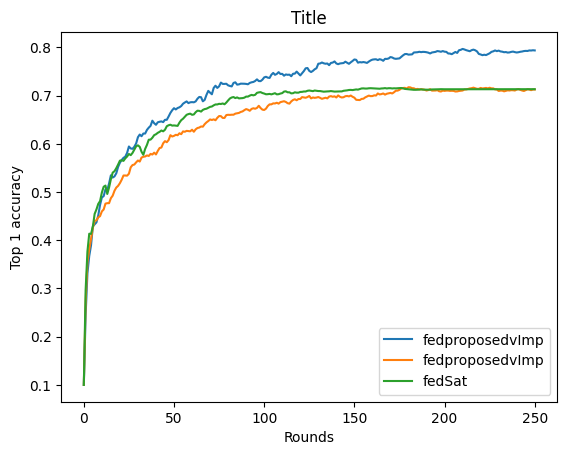

In [27]:
X=None
Y=[]
Legends = []
for file in files:
    with open(file, 'r') as f:
        # Load the JSON data
        data = json.load(f)
        x = data['x']
        y, _ = data['y']
        if X is not None:
            if len(X)>len(x):
                X = x
        else: X = x
        # print(f'Y length: {len(y)}, \n{y}')
        Y.append(y[0])
        print(data.keys())
        s_file = file.split('/')
        method = s_file[-1].split("_")[0]
        Legends.append(method)
plot_data_dict = {}
plot_data_dict["name"] = 'Exp1'
plot_data_dict['x'] = X
plot_data_dict['y'] = [y[:len(x)] for y in Y]
plot_data_dict["legends"] = Legends
plot_data_dict["labels"] = ["Rounds", "Top 1 accuracy"]
plot_data_dict["dual_axis"] = False
Title = f'Title'

plot_data_dict_in_pdf(data=plot_data_dict,show=True )